In [103]:
import numpy as np
import random
import pandas as pd
import math
from matplotlib.pyplot import plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import itertools
import multiprocessing as mp
import time
import sys

In [25]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared, model_k

In [26]:
X = np.random.randint(5,size=(1000,20))
B = np.random.ranf(size=(20,1))
B[0] = 0
B[3] = 0
B[17] = 0
epsilon = np.random.ranf(size=(1000,1))
Y = X.dot(B) + epsilon

train_x = pd.DataFrame(X[:900,:])
train_y = pd.DataFrame(Y[:900,:])
test_x = pd.DataFrame(X[900:,:])
test_y = pd.DataFrame(Y[900:,:])

In [30]:
test_x.shape
test_y.shape

(100, 1)

In [39]:
# 6.8.10 c

remaining_features = list(train_x.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()
test_scores = []
models = []

for i in range(1,len(train_x.columns)+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(train_x[list(combo) + features],train_y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]
                best_model = RSS[2]
                current_best_combo = list(combo) + features

    test_scores.append(
        mean_squared_error(test_y, best_model.predict(test_x[current_best_combo])) 
            * len(test_y)
        )
    models.append(best_model)

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [40]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,21)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, [2], 11350),
 (2, [2, 11], 9845),
 (3, [2, 11, 9], 8409),
 (4, [2, 11, 9, 14], 7096),
 (5, [2, 11, 9, 14, 19], 6118),
 (6, [2, 11, 9, 14, 19, 13], 5187),
 (7, [2, 11, 9, 14, 19, 13, 18], 4277),
 (8, [2, 11, 9, 14, 19, 13, 18, 12], 3581),
 (9, [2, 11, 9, 14, 19, 13, 18, 12, 4], 2866),
 (10, [2, 11, 9, 14, 19, 13, 18, 12, 4, 7], 2171),
 (11, [2, 11, 9, 14, 19, 13, 18, 12, 4, 7, 16], 1510),
 (12, [2, 11, 9, 14, 19, 13, 18, 12, 4, 7, 16, 5], 1075),
 (13, [2, 11, 9, 14, 19, 13, 18, 12, 4, 7, 16, 5, 1], 697),
 (14, [2, 11, 9, 14, 19, 13, 18, 12, 4, 7, 16, 5, 1, 15], 356),
 (15, [2, 11, 9, 14, 19, 13, 18, 12, 4, 7, 16, 5, 1, 15, 6], 215),
 (16, [2, 11, 9, 14, 19, 13, 18, 12, 4, 7, 16, 5, 1, 15, 6, 10], 79),
 (17, [2, 11, 9, 14, 19, 13, 18, 12, 4, 7, 16, 5, 1, 15, 6, 10, 8], 78),
 (18, [2, 11, 9, 14, 19, 13, 18, 12, 4, 7, 16, 5, 1, 15, 6, 10, 8, 0], 77),
 (19, [2, 11, 9, 14, 19, 13, 18, 12, 4, 7, 16, 5, 1, 15, 6, 10, 8, 0, 3], 77),
 (20,
  [2, 11, 9, 14, 19, 13, 18, 12, 4, 7, 16, 5, 1, 15

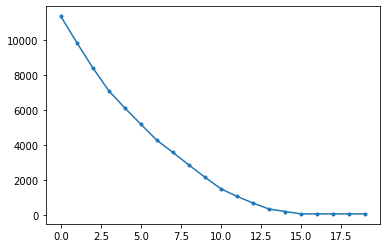

In [73]:
plot(train_x.columns, RSS_list[1:], marker='.')

In [66]:
test_scores

[1525.250663481969,
 1227.6129515184946,
 983.0994451735521,
 900.6647964388949,
 828.3789297013132,
 728.4902417221782,
 663.4027734367119,
 492.70372285445967,
 382.7613390659264,
 265.43974571650483,
 178.06177101730594,
 109.62472024147726,
 76.83485393889072,
 37.23151358437416,
 22.348667163836737,
 9.46938975928558,
 8.969451962664516,
 8.95071797955599,
 8.963915175892046,
 8.988251260177918]

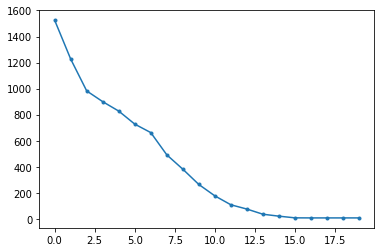

In [74]:
# 6.8.10 d

plot(train_x.columns, test_scores, marker='.')

In [ ]:
# 6.8.10 e 

# We see the lowest MSE for model with 18 features - which means it only includes one of the coefficients initialized to 0, which makes a lot of sense, as these shouldn't give any improvements to the model.

In [82]:
# 6.8.10 f

for i, feature in enumerate(features_list[18]):
    print('Feature: ', feature)
    print(round(models[17].coef_[0][i], 2))  
# Skriv noget klogt

Feature:  2
-0.01
Feature:  11
0.94
Feature:  9
0.84
Feature:  14
0.99
Feature:  19
0.83
Feature:  13
0.71
Feature:  18
0.68
Feature:  12
0.65
Feature:  4
0.74
Feature:  7
0.67
Feature:  16
0.68
Feature:  5
0.61
Feature:  1
0.5
Feature:  15
0.45
Feature:  6
0.43
Feature:  10
0.28
Feature:  8
0.27
Feature:  0
0.03


In [97]:
models[17].coef_[0]

array([-0.00921749,  0.93994888,  0.84392947,  0.98892179,  0.83496096,
        0.70642993,  0.67601802,  0.65016805,  0.74465056,  0.66888114,
        0.67575937,  0.61123624,  0.50068431,  0.44556985,  0.43224698,
        0.2826663 ,  0.27424168,  0.02573197])

In [115]:
# 6.8.10 g
b = 0
j = 0

for i in features_list[18]:
    b += (B[i] - models[17].coef_[0][j])**2
    # print(coeff)
    j += 1

b

array([1.06947886])